In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

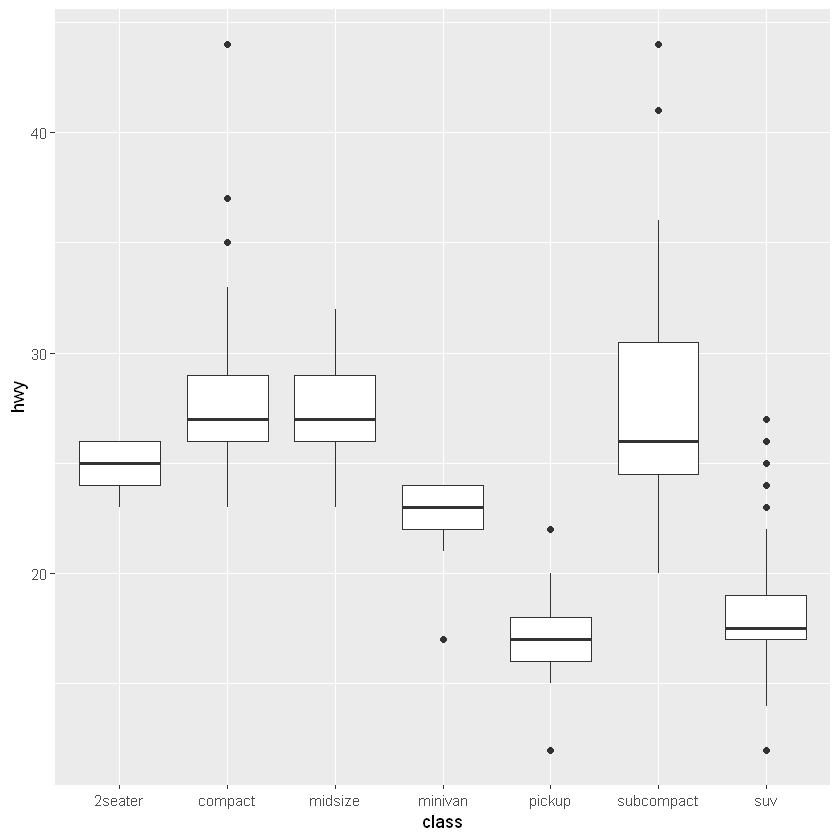

In [3]:
p <- ggplot(mpg, aes(class, hwy))
p + geom_boxplot()

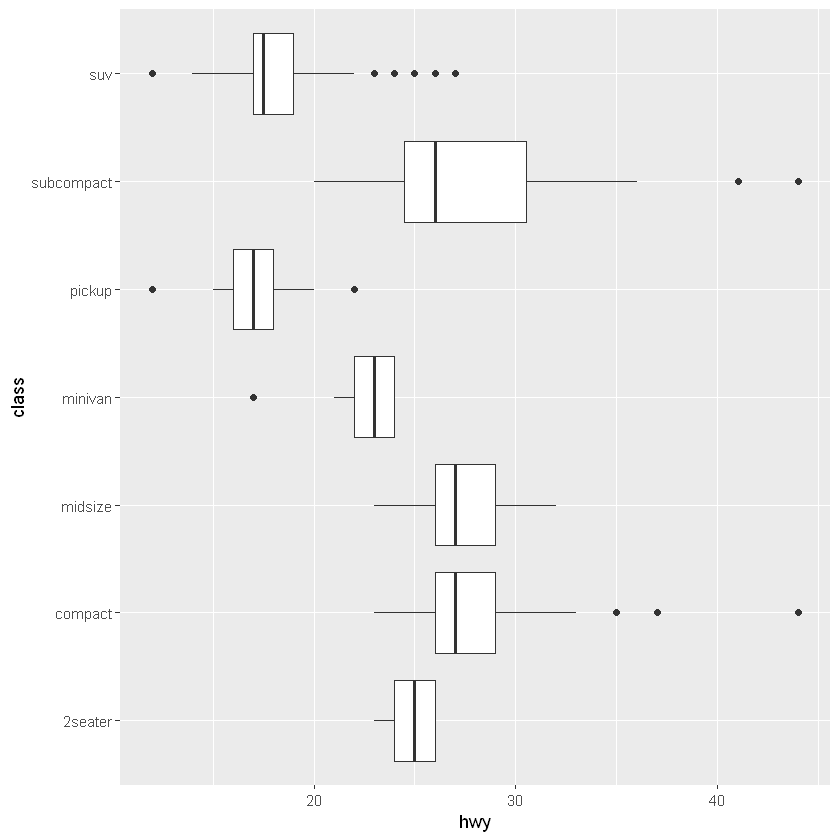

In [4]:
p + geom_boxplot() + coord_flip()

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


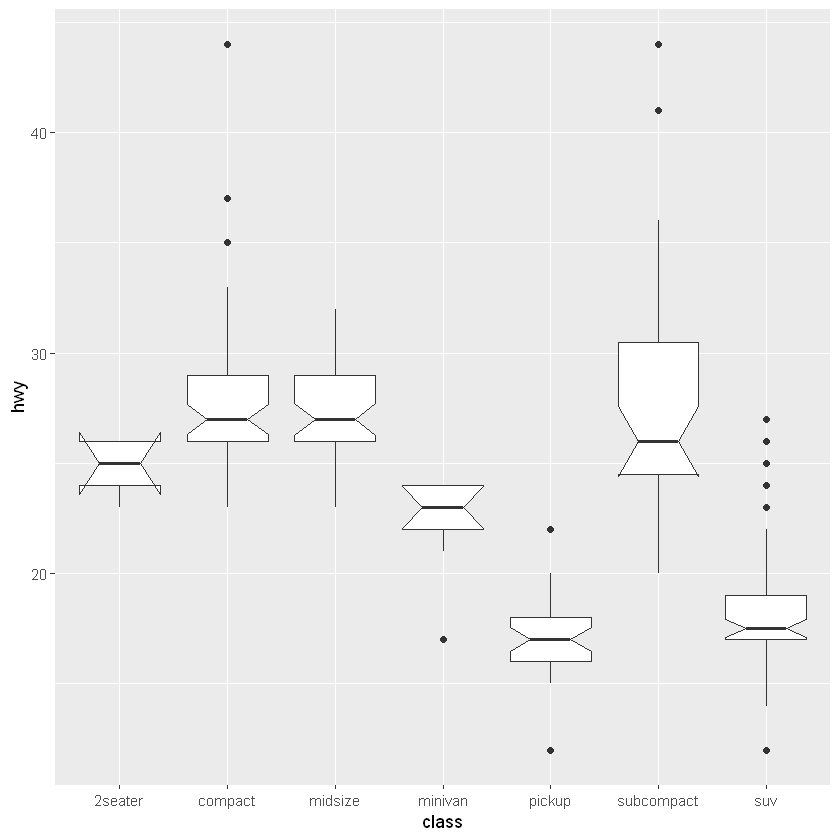

In [5]:
p + geom_boxplot(notch = TRUE)

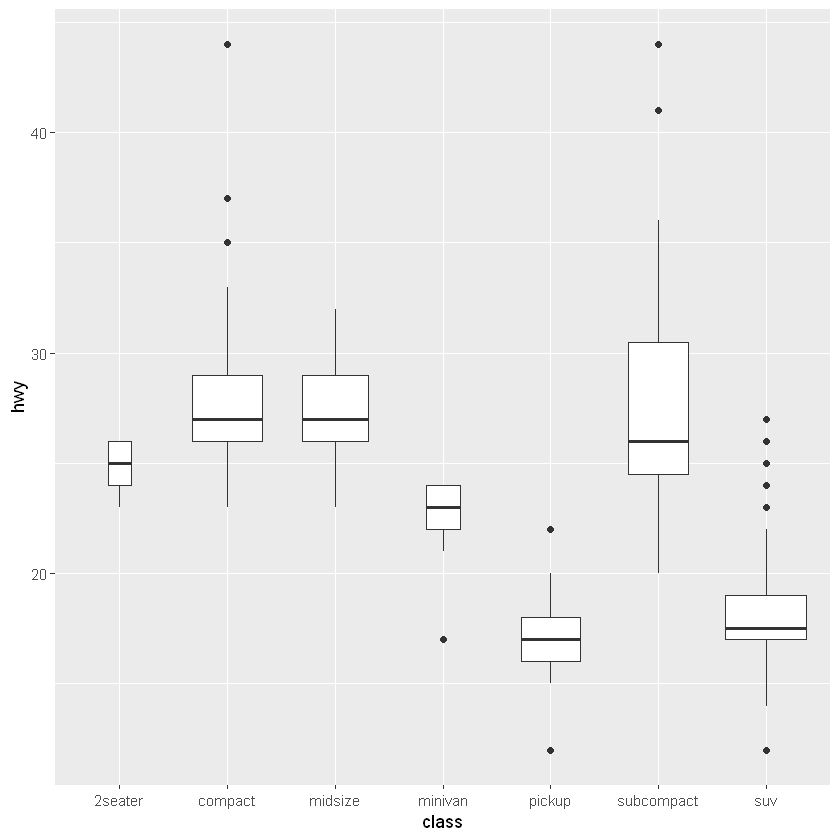

In [6]:
p + geom_boxplot(varwidth = TRUE)

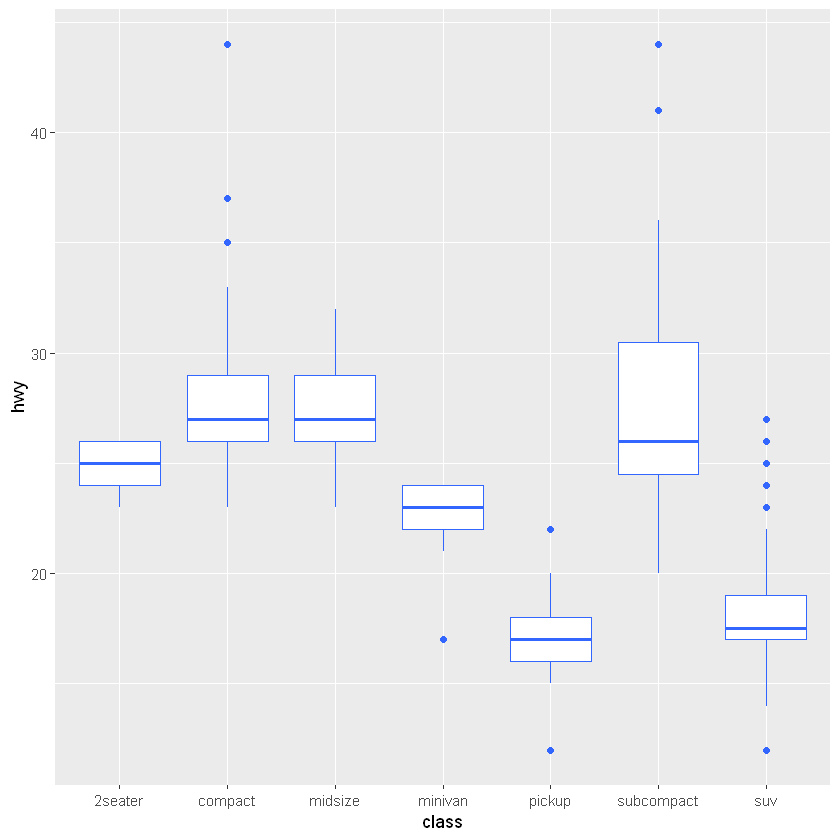

In [7]:
p + geom_boxplot(fill = "white", colour = "#3366FF")

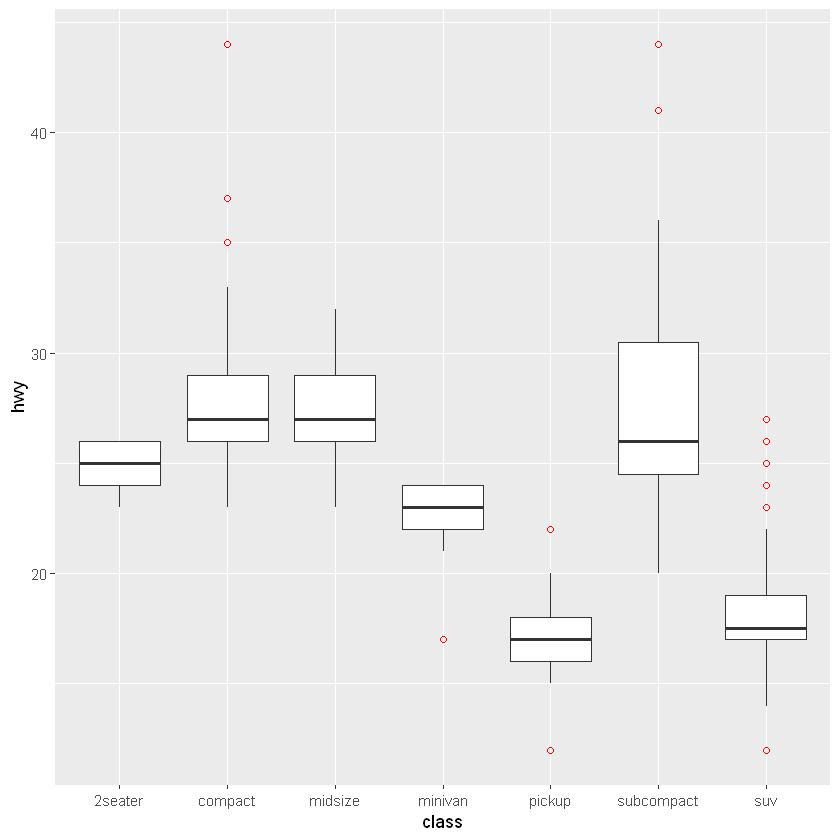

In [8]:
# By default, outlier points match the colour of the box.
# Use outlier.colour to override

p + geom_boxplot(outlier.colour = "red", outlier.shape = 1)

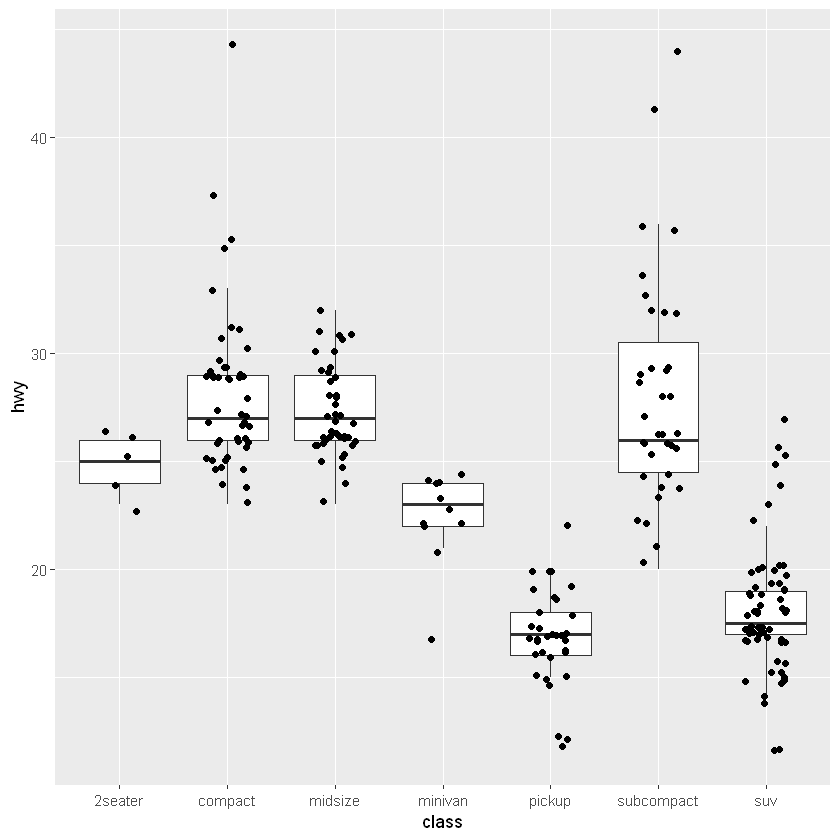

In [9]:
# Remove outliers when overlaying boxplot with original data points

p + geom_boxplot(outlier.shape = NA) + geom_jitter(width = 0.2)

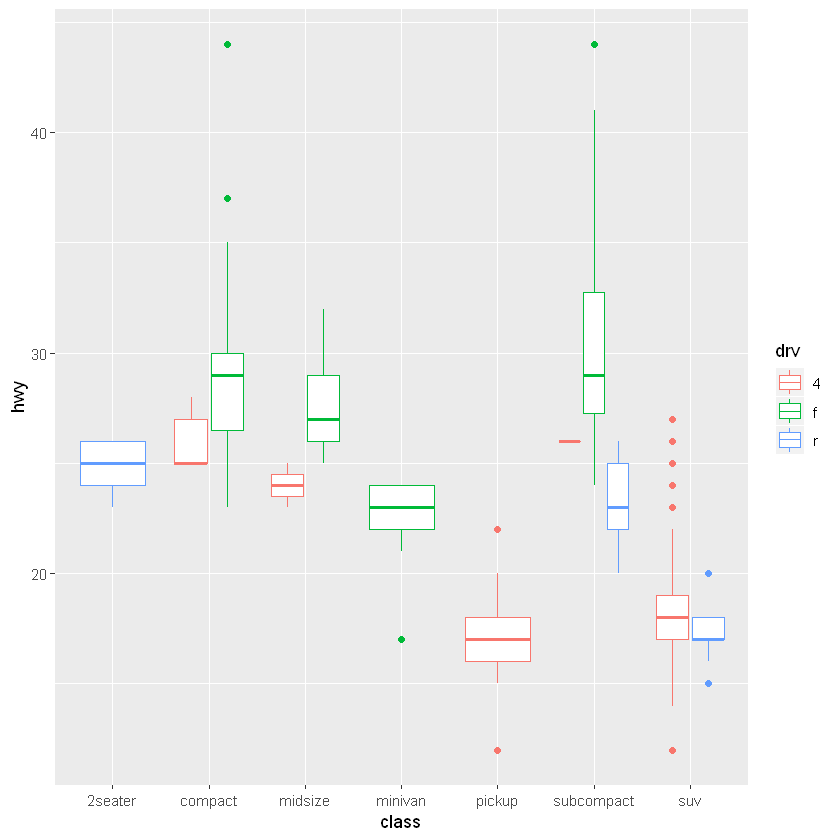

In [10]:
# Boxplots are automatically dodged when any aesthetic is a factor

p + geom_boxplot(aes(colour = drv))

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

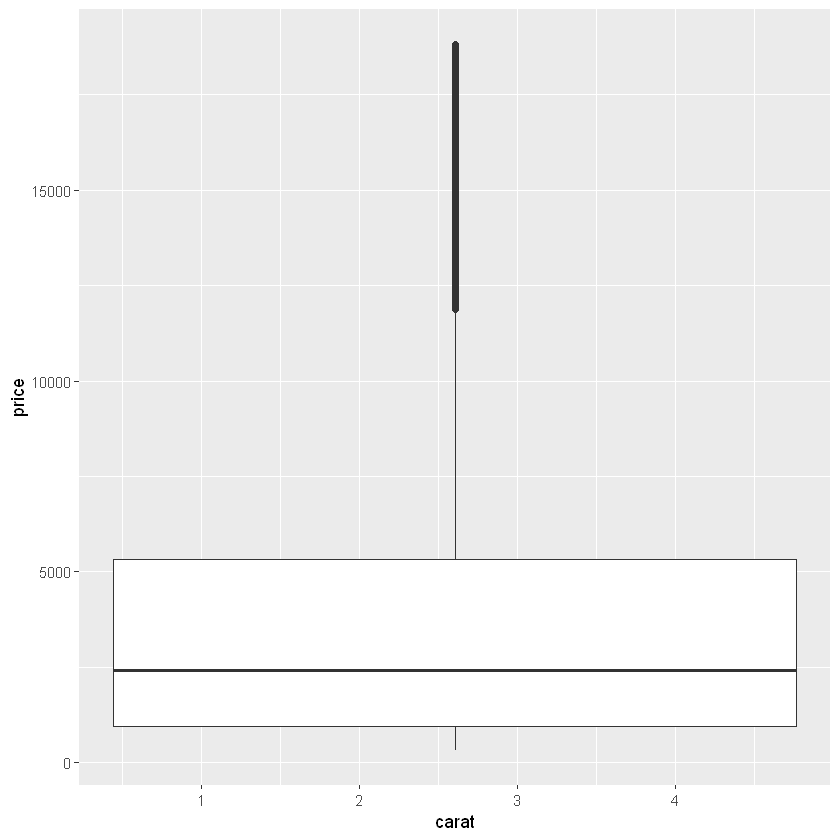

In [11]:
# Boxplots can also be used with a continuous x, as long as
# a grouping variable's supplied. cut_width is particularly
# useful

ggplot(diamonds, aes(carat, price)) +
  geom_boxplot()

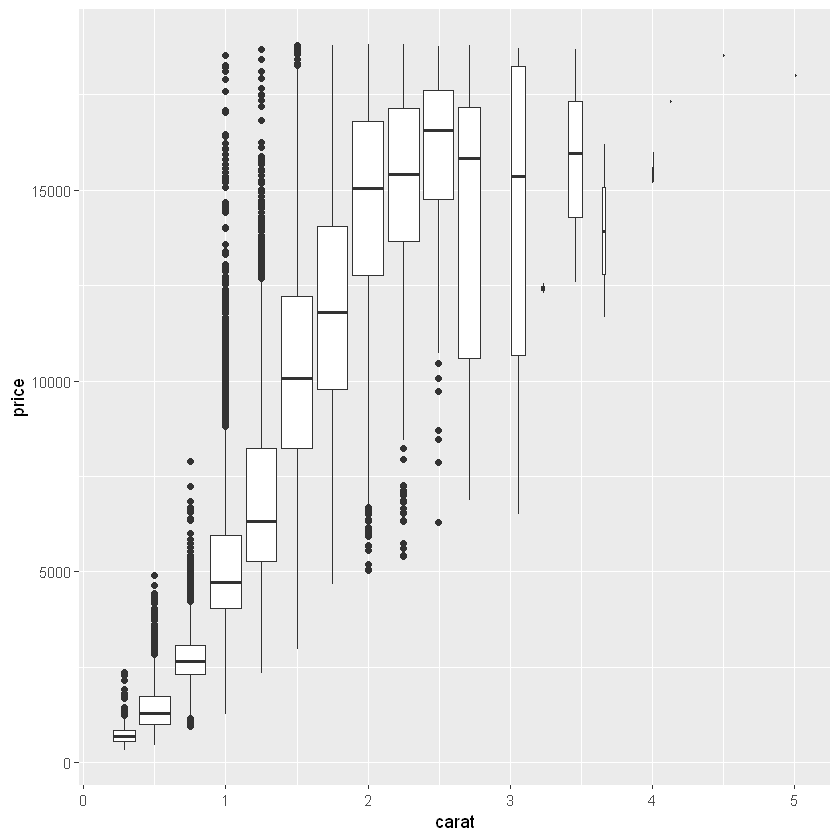

In [12]:
ggplot(diamonds, aes(carat, price)) +
  geom_boxplot(aes(group = cut_width(carat, .25)))

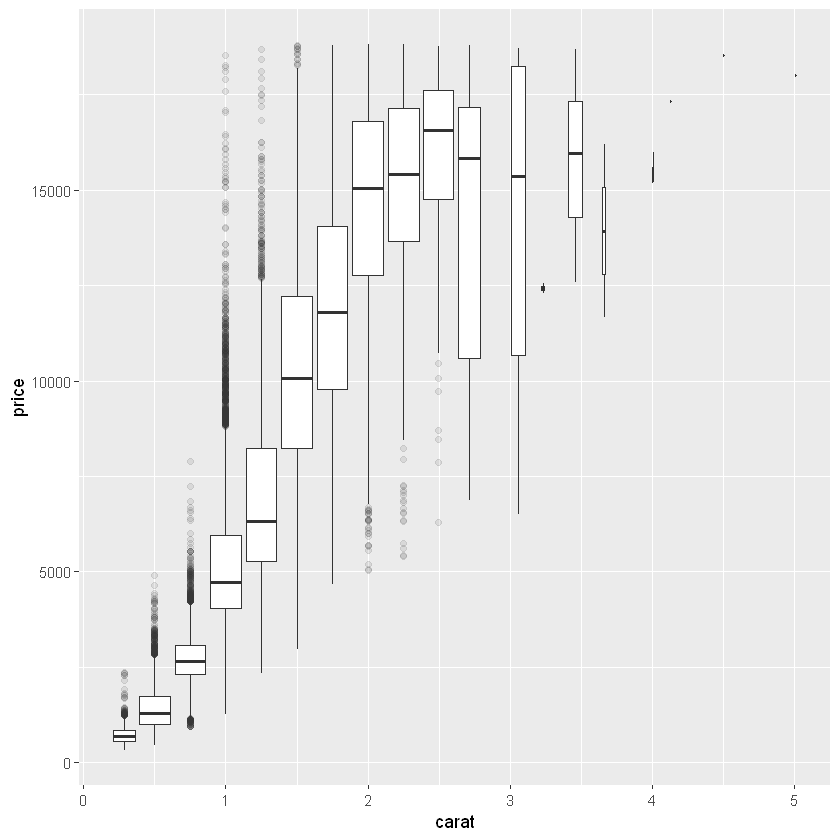

In [13]:
# To adjust the transparency of outliers, use outlier.alpha

ggplot(diamonds, aes(carat, price)) +
  geom_boxplot(aes(group = cut_width(carat, 0.25)),
               outlier.alpha = 0.1)

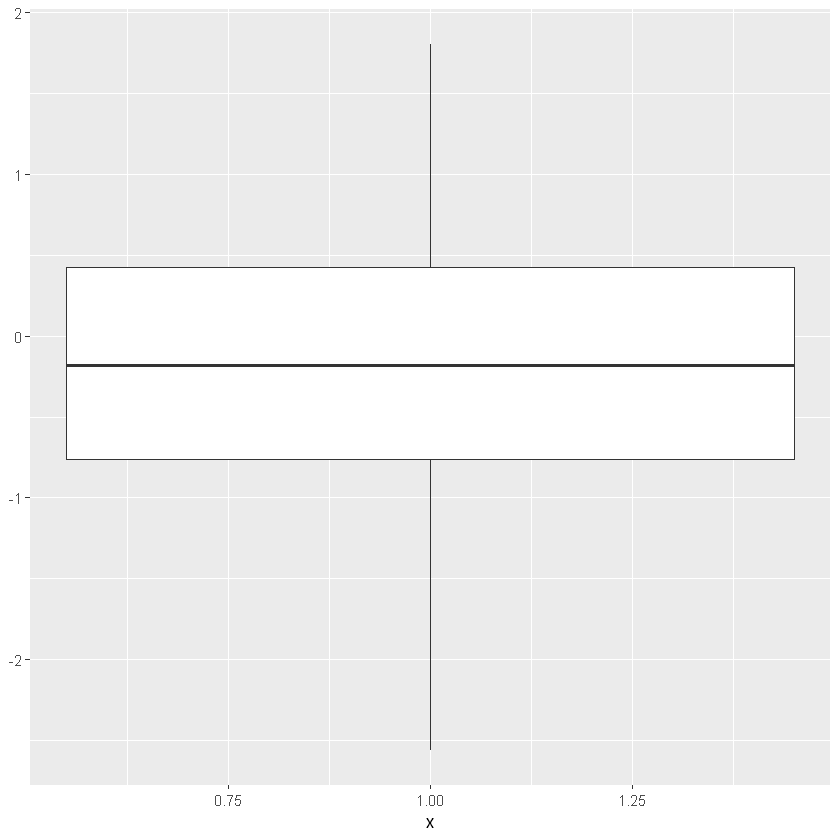

In [14]:
# Using stat = "identity", it's possible to draw a boxplot
# with one's own computations

y <- rnorm(100)
df <- data.frame(
  x = 1,
  y0 = min(y),
  y25 = quantile(y, 0.25),
  y50 = median(y),
  y75 = quantile(y, 0.75),
  y100 = max(y))

ggplot(df, aes(x)) +
  geom_boxplot(
    aes(ymin = y0, lower = y25, middle = y50, upper = y75,
        ymax = y100), stat = "identity")